In [1]:
import scanpy as sc

from pyclustree import clustree

adata = sc.datasets.pbmc3k_processed()

# Run leiden clustering for different resolutions
for resolution in [0.2, 0.4, 0.6, 0.8, 1.0]:
    sc.tl.leiden(
        adata,
        resolution=resolution,
        flavor="igraph",
        n_iterations=2,
        key_added=f"leiden_{str(resolution).replace('.', '_')}",
    )

In [2]:
# Create a clustree visualization
cluster_keys = [f"leiden_{str(resolution).replace('.', '_')}" for resolution in [0.2, 0.4, 0.6, 0.8, 1.0]]

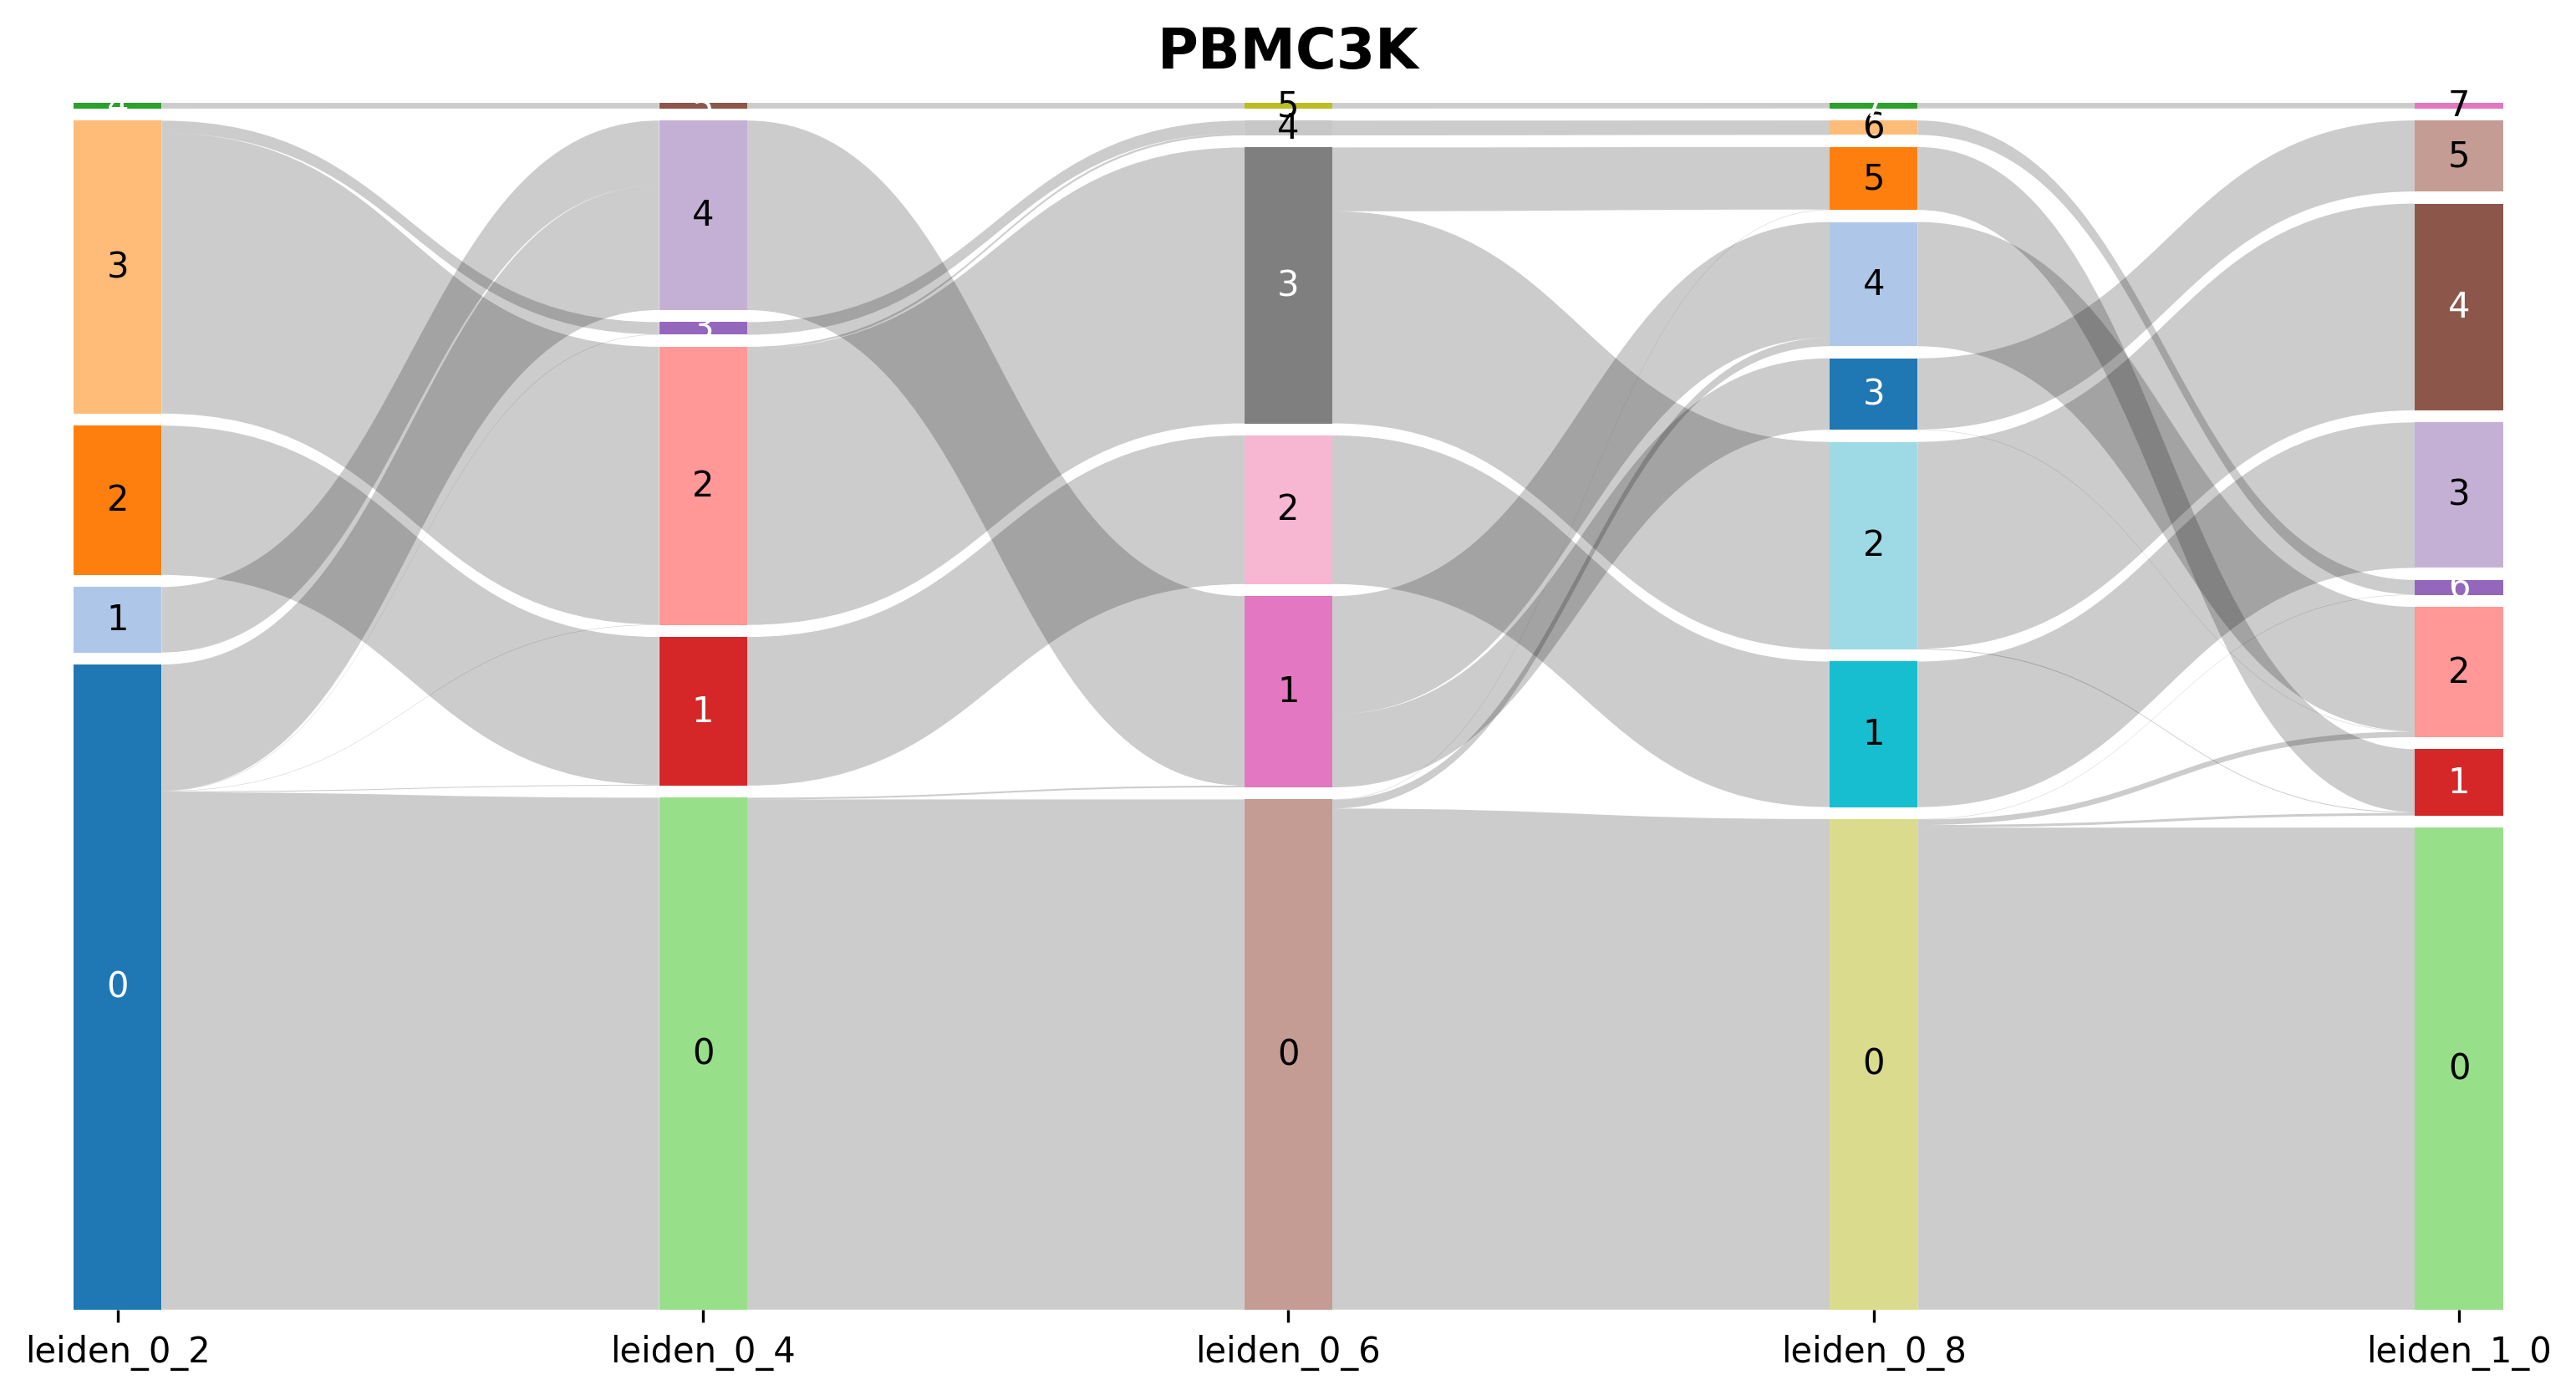

In [3]:
fig = clustree(
    adata,
    cluster_keys=cluster_keys,
    transition_plot="sankey",
    node_colormap="tab20",
    title="PBMC3K",
)

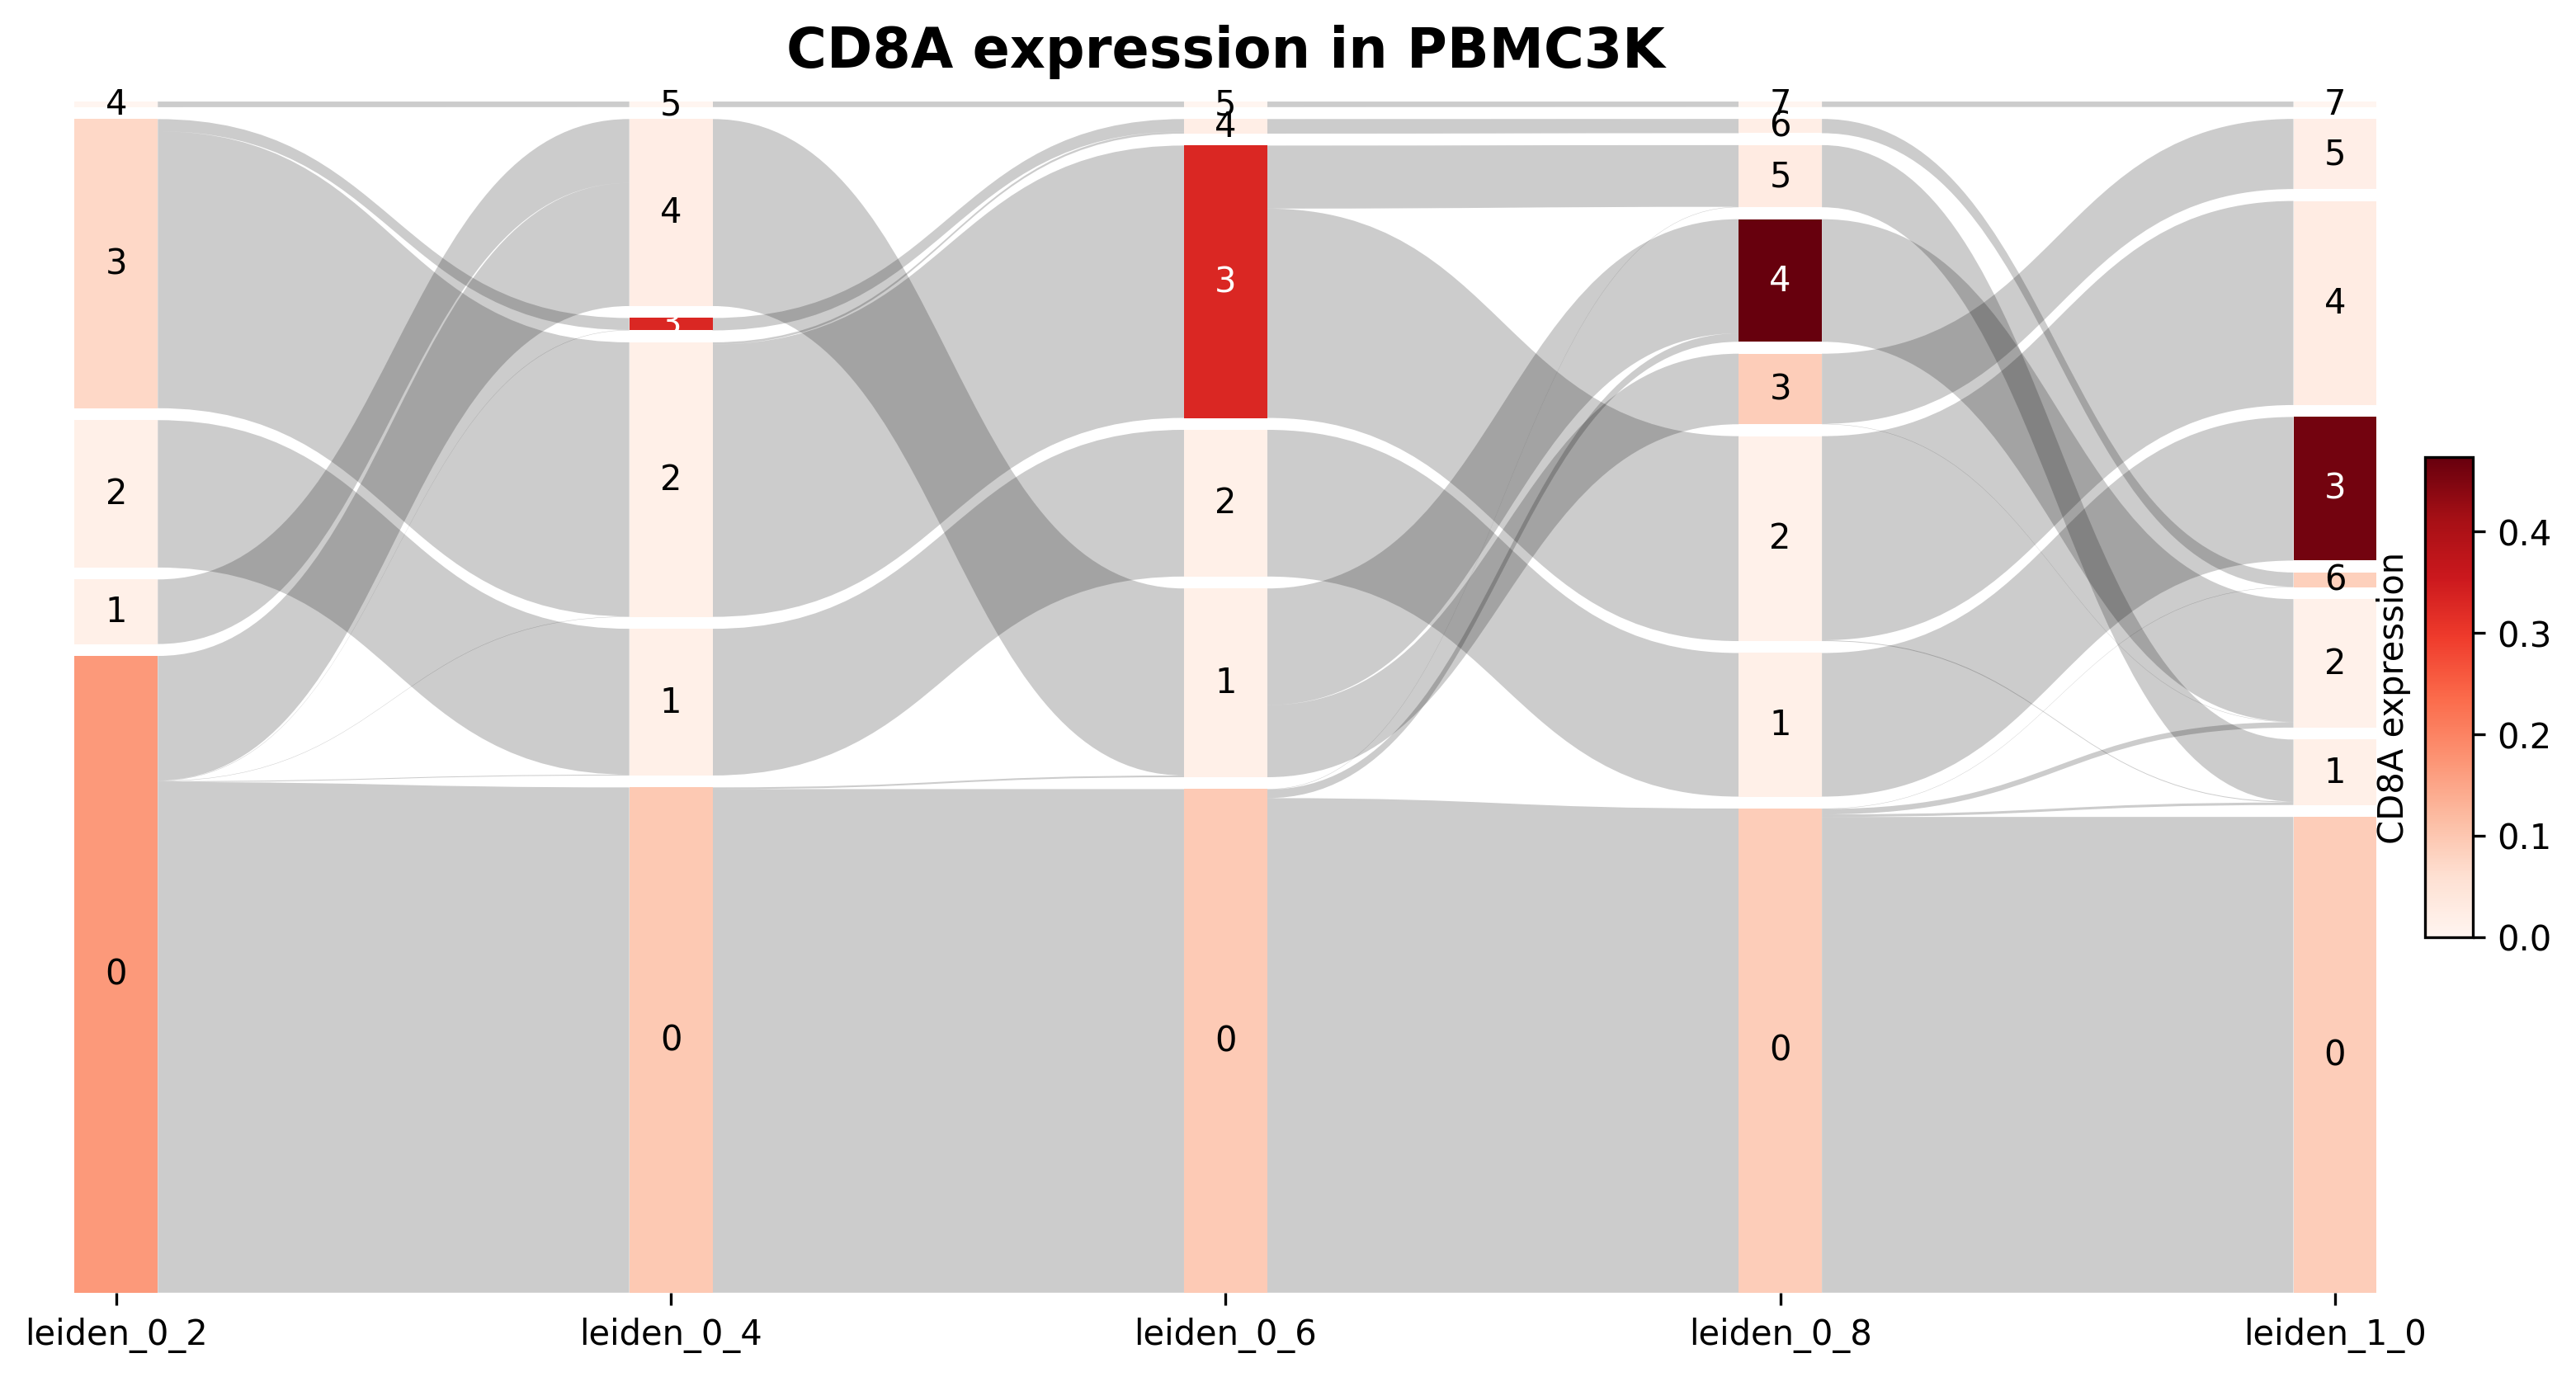

In [4]:
fig = clustree(
    adata,
    cluster_keys=cluster_keys,
    transition_plot="sankey",
    node_color_gene="CD8A",
    node_colormap="Reds",
    title="CD8A expression in PBMC3K",
    show_colorbar=True,
)

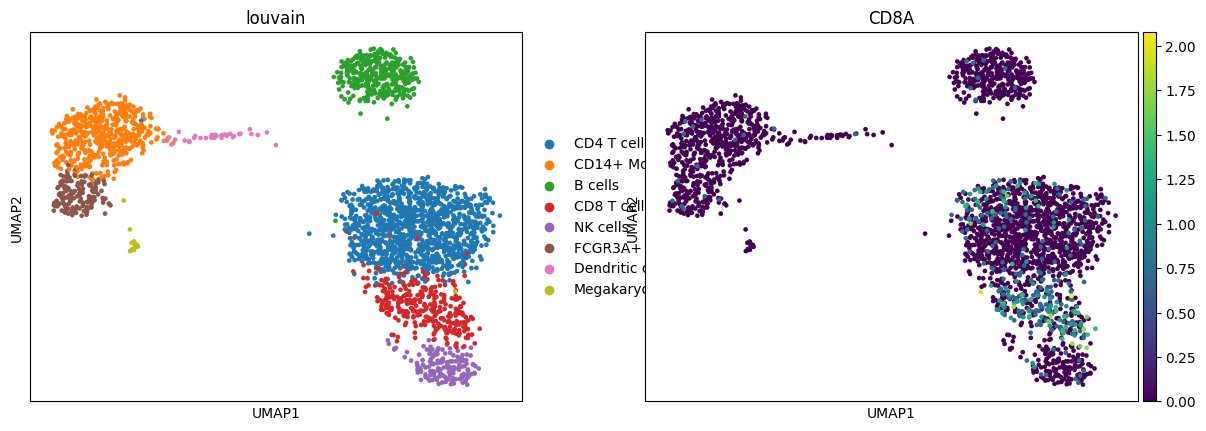

In [13]:
sc.pl.umap(adata, color=["louvain", "CD8A"])